In [52]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [53]:
def transform(image):
    img = pp(image)
    img2 = dbscan(img)
    #img3 = plot(img2)
    return img2
    
    

In [54]:
#Delete all pixels that are outside of a certain red/green range
def pp(image):
    image = np.array(image[0:800][0:515])
    image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    image[np.logical_not(np.logical_or(np.logical_and(image[:,:,0] > 70, image[:,:,0] < 90),np.logical_or(image[:,:,0] >= 170, image[:,:,0] < 10)))] = [0,0,0]
    image = cv.cvtColor(image,cv.COLOR_HSV2BGR)
    return(image)

In [55]:
def compare(image):
    labimg = cv.cvtColor(image,cv.COLOR_BGR2LAB)

    n=0
    while(n<3):
        labimg = cv.pyrDown(labimg)
        n = n+1

    feature_image = np.reshape(labimg, [-1,3])
    rows,cols,chs = labimg.shape

    db = DBSCAN(eps=10, min_samples=100, metric = 'euclidean',algorithm = 'auto')
    db.fit(feature_image)
    labels = db.labels_
    
    plt.figure(2)
    plt.subplot(2, 1, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.subplot(2, 1, 2)
    plt.imshow(np.reshape(labels, [rows, cols]))
    plt.axis('off')
    plt.show()

    return (labels)

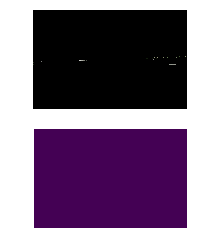

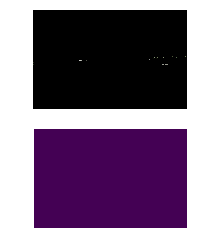

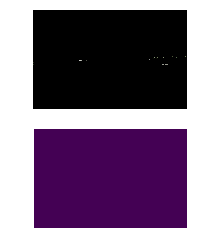

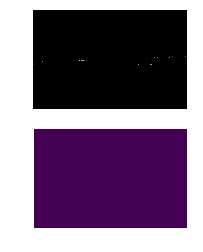

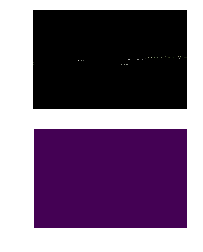

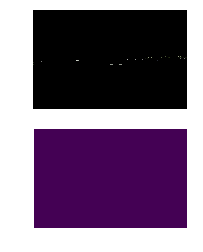

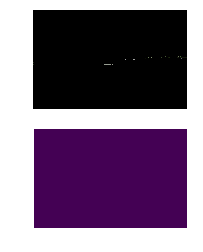

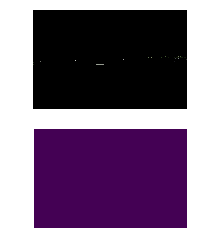

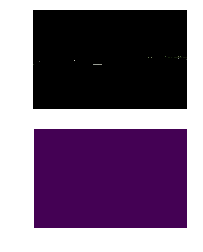

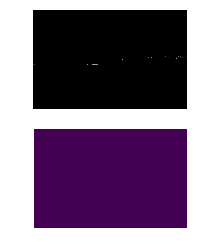

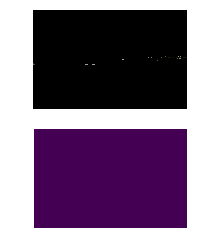

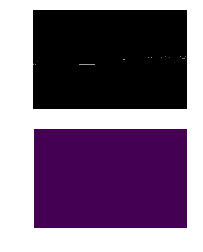

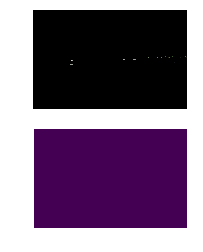

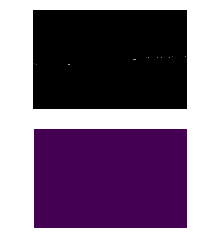

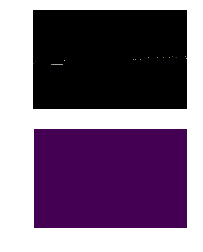

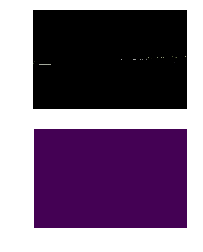

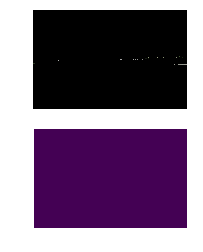

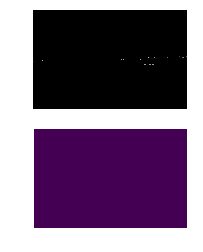

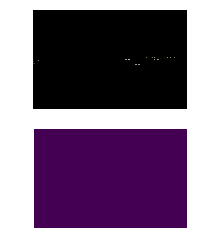

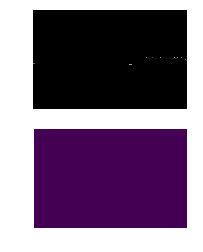

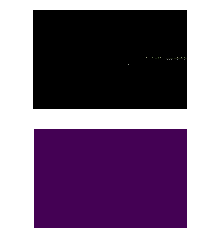

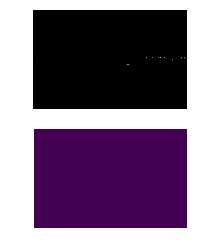

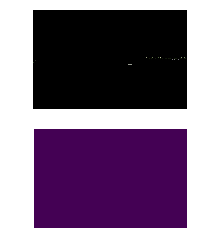

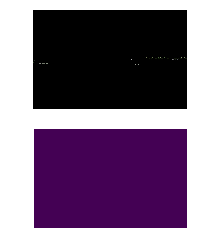

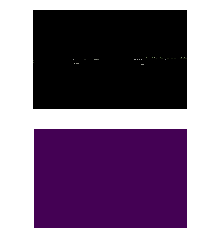

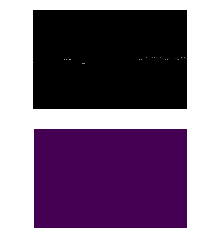

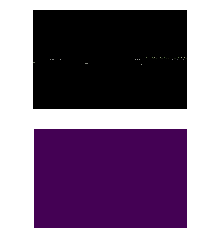

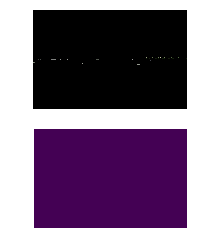

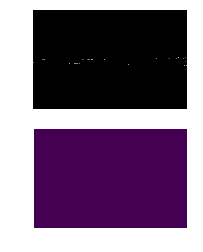

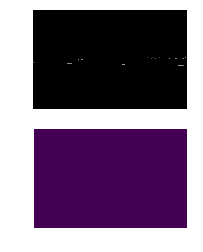

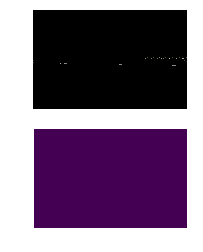

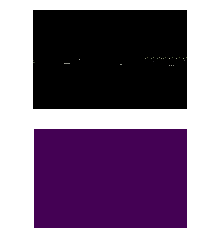

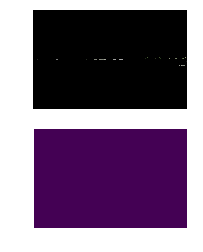

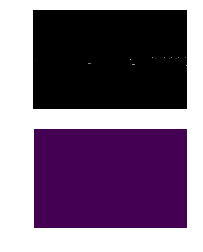

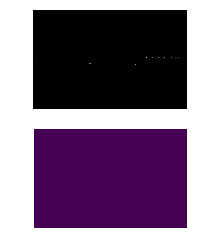

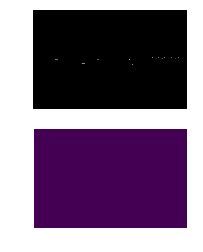

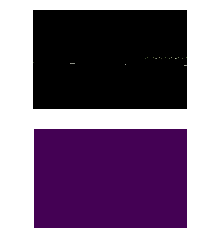

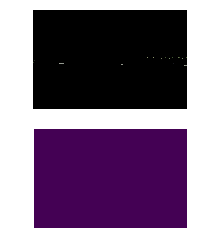

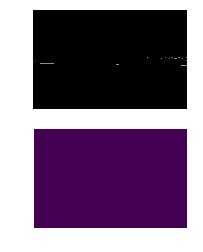

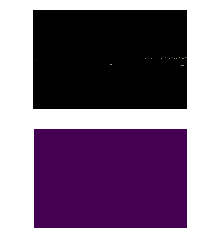

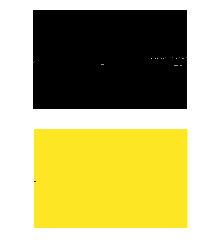

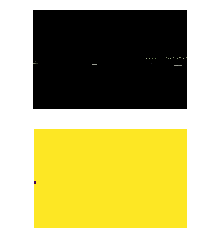

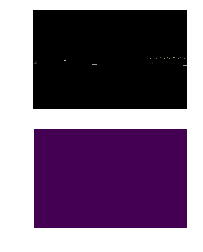

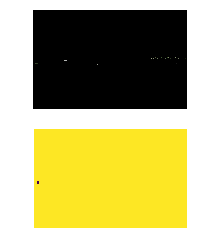

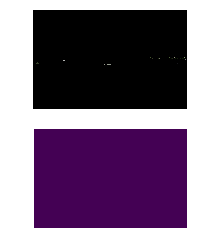

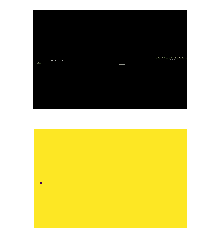

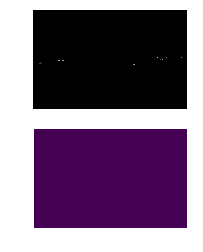

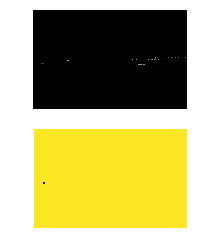

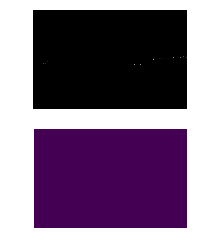

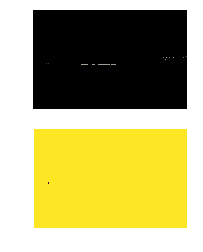

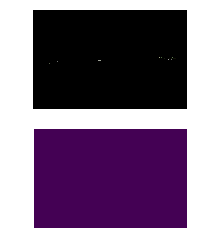

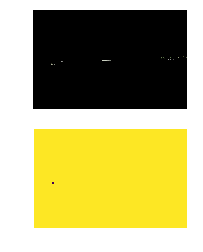

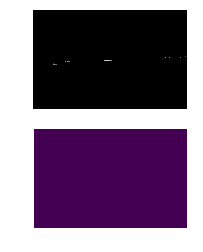

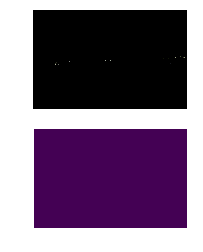

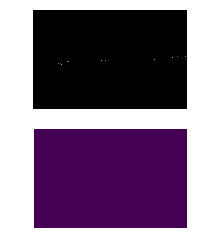

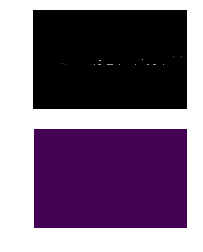

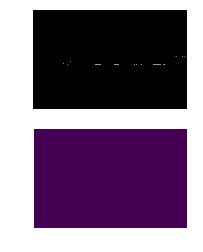

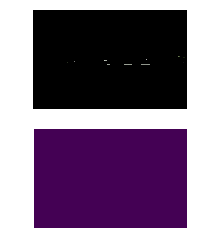

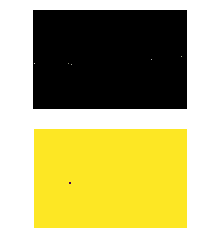

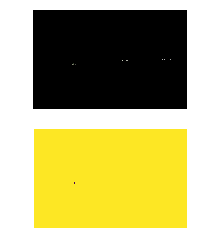

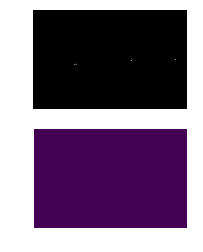

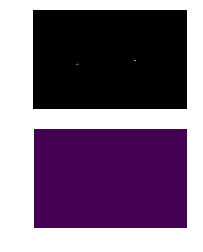

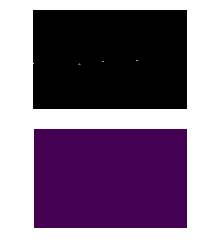

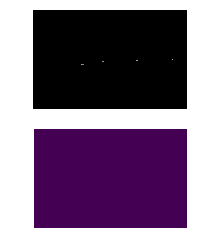

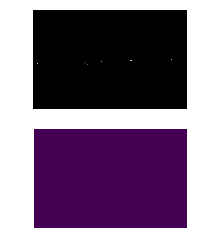

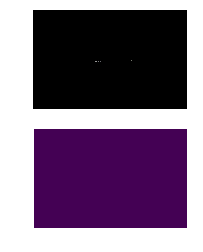

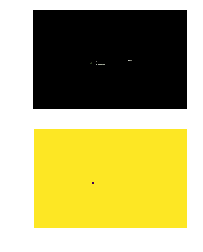

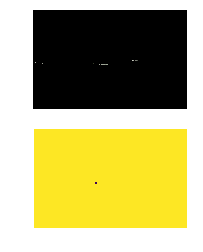

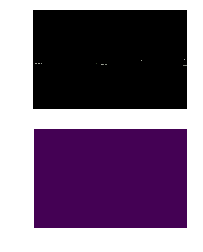

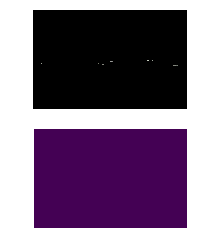

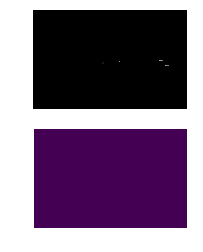

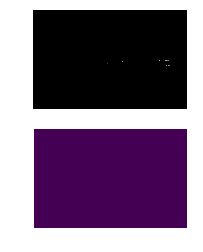

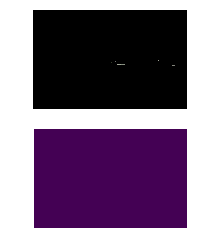

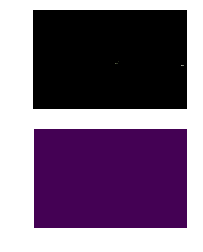

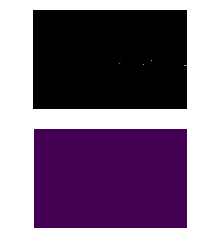

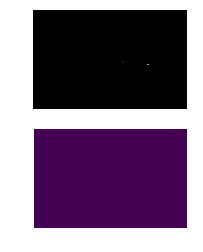

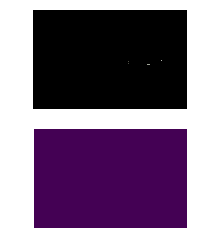

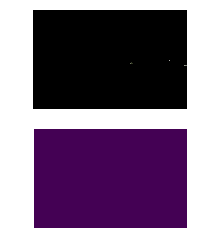

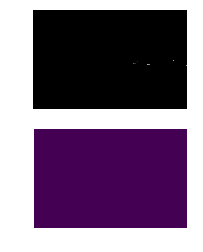

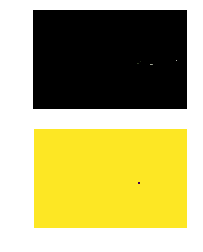

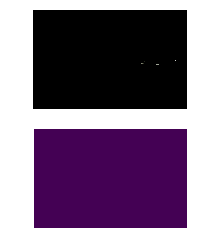

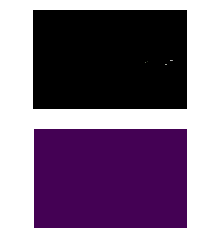

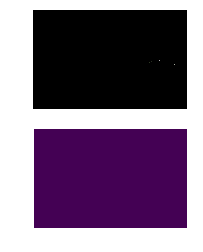

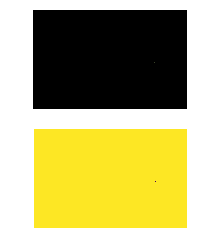

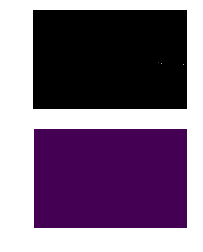

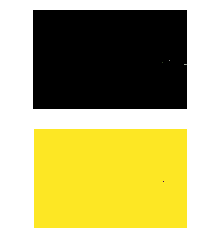

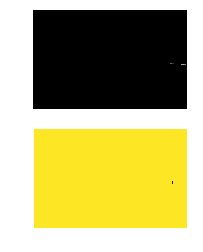

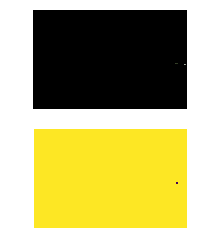

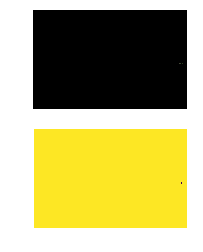

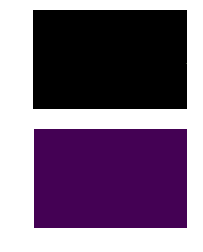

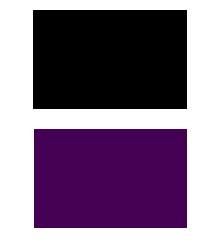

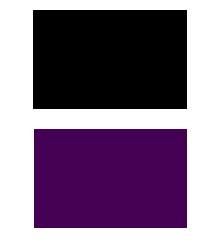

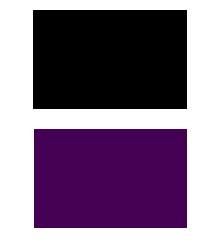

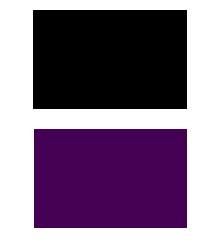

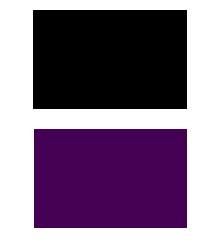

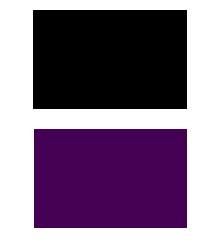

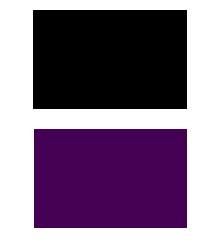

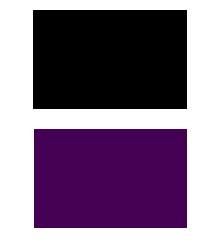

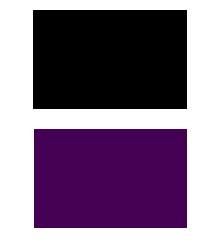

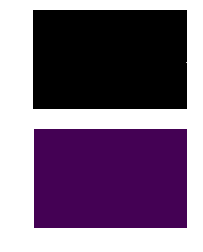

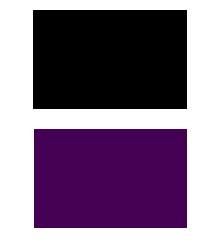

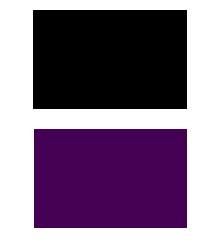

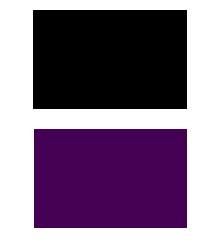

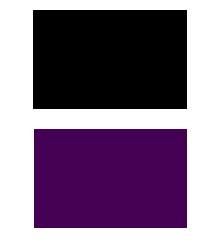

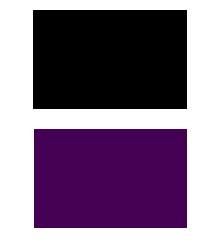

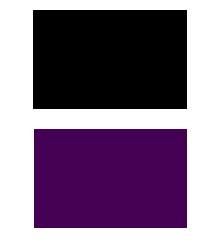

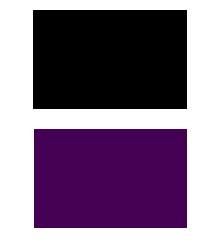

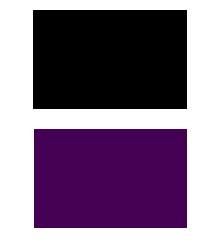

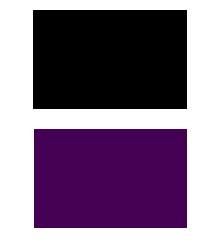

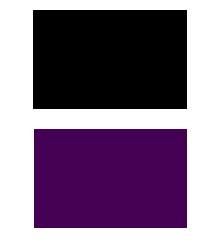

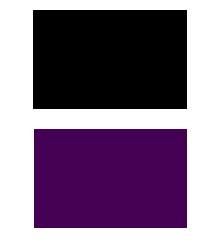

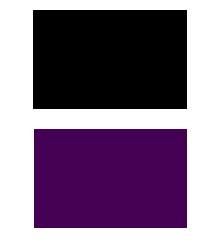

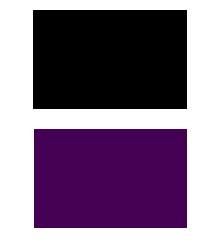

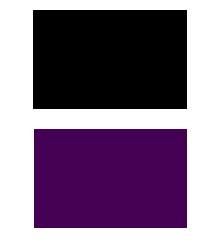

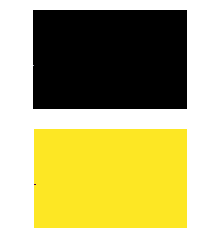

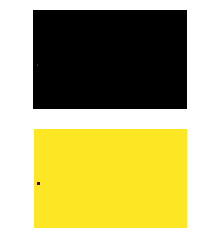

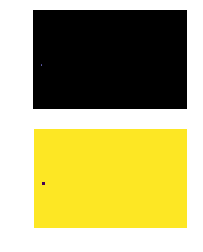

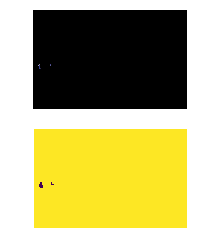

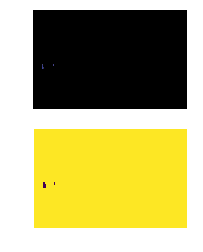

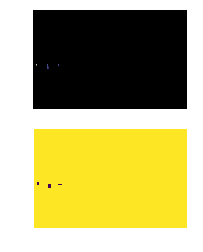

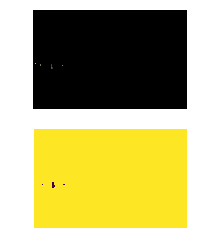

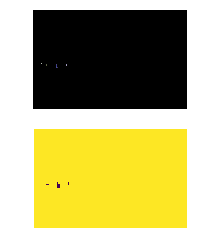

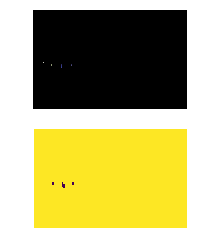

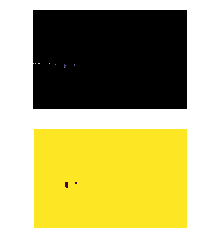

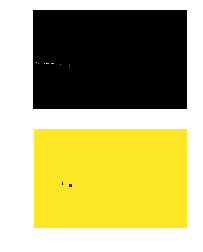

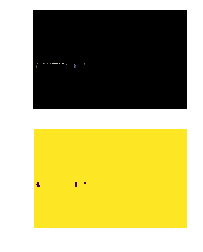

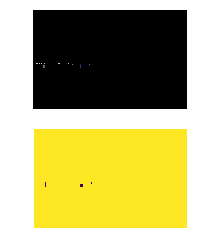

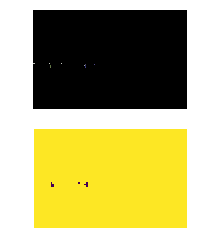

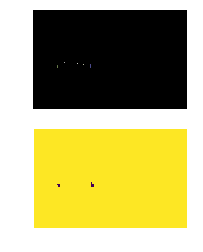

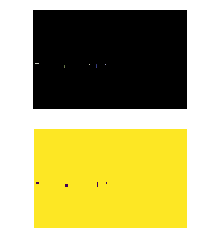

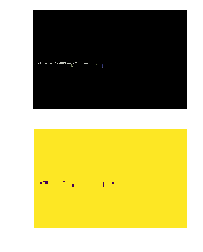

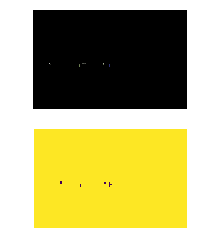

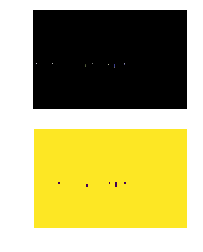

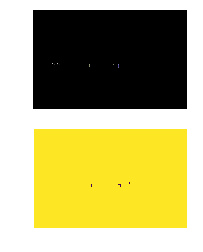

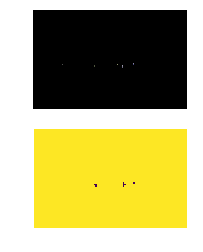

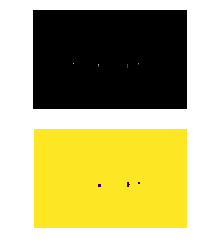

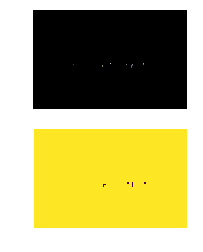

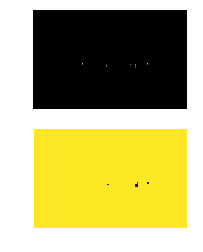

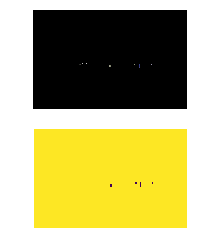

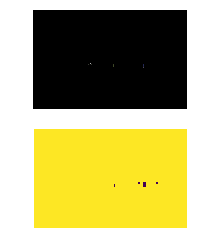

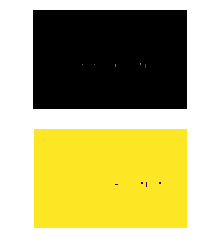

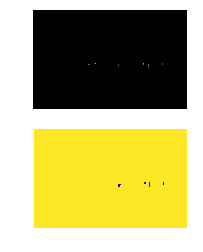

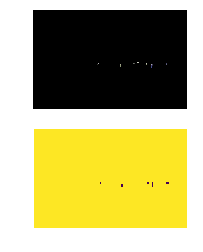

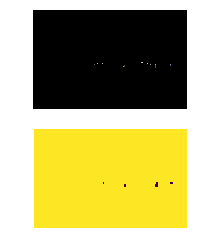

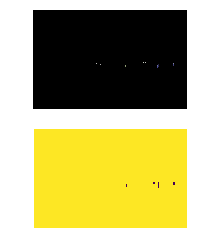

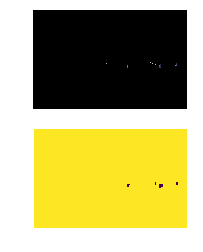

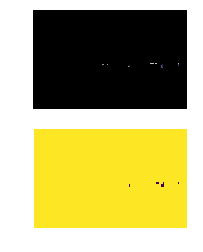

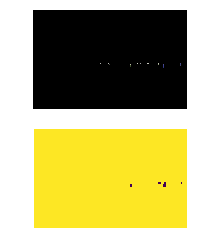

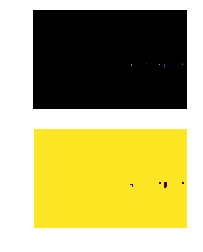

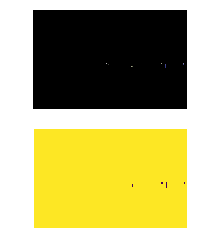

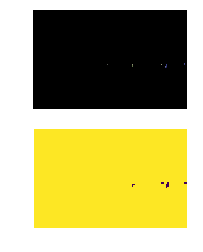

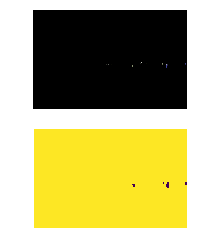

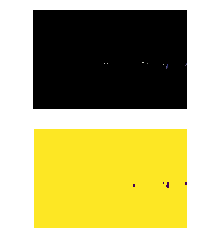

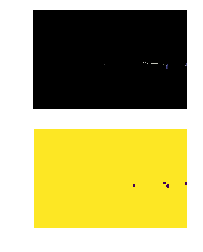

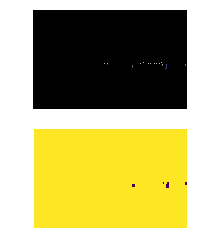

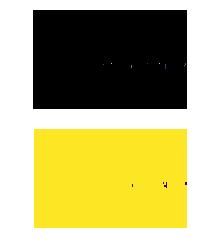

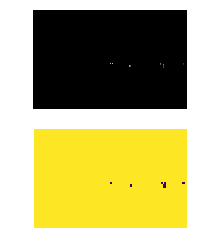

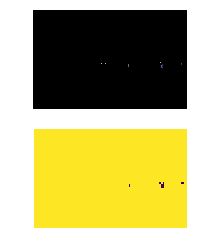

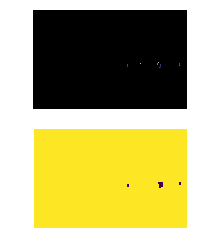

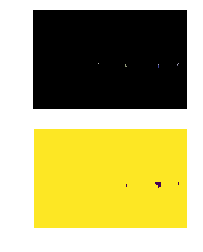

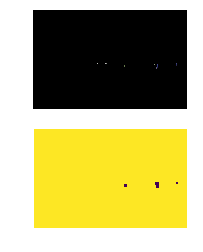

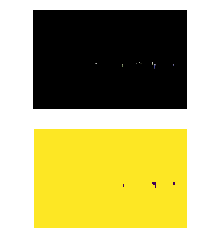

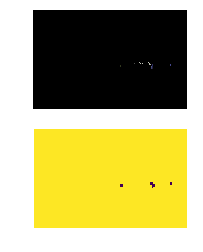

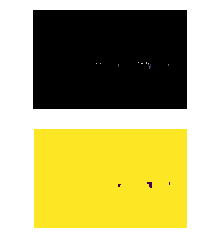

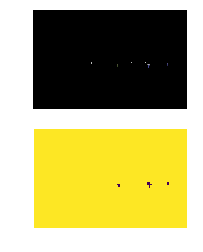

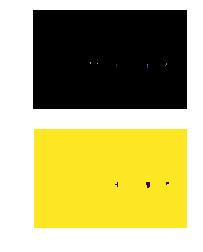

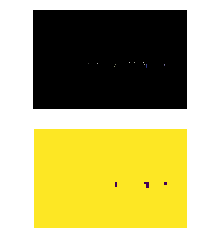

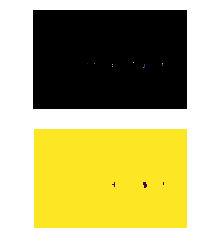

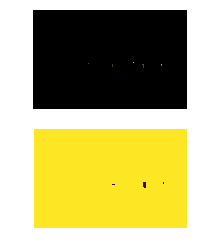

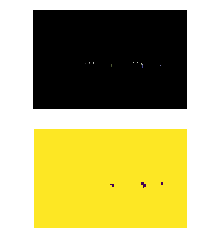

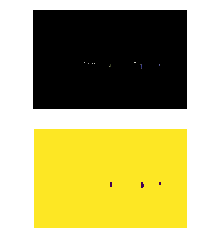

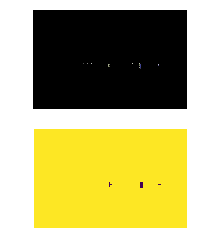

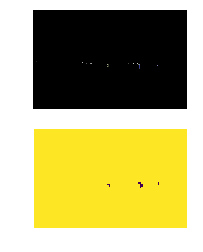

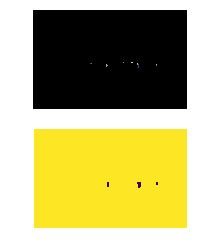

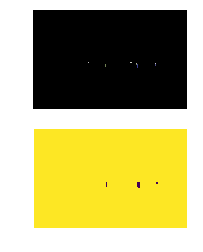

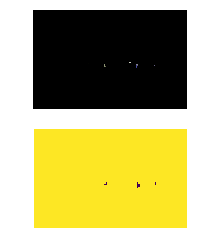

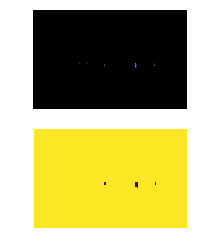

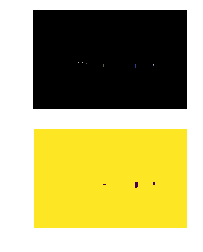

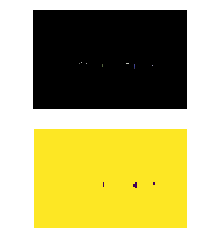

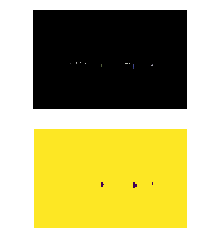

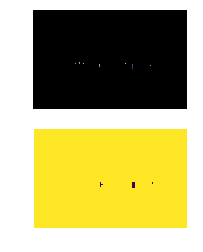

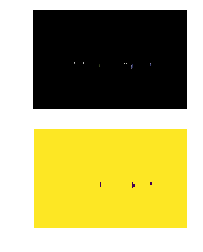

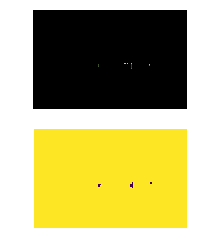

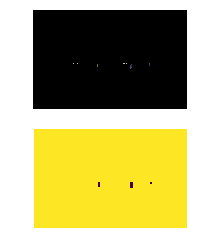

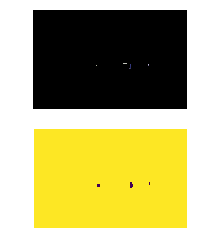

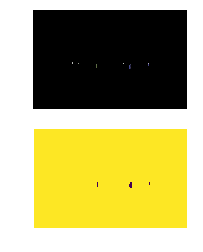

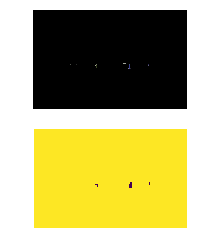

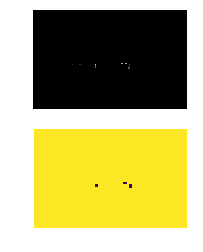

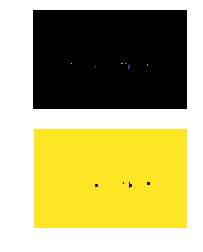

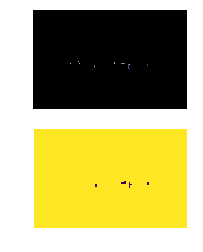

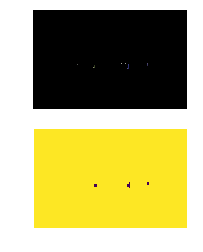

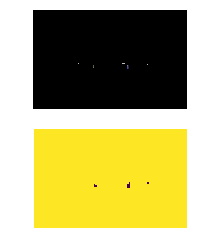

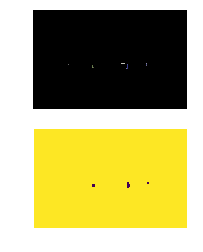

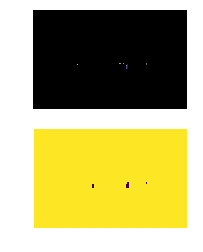

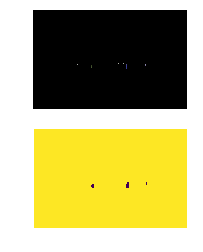

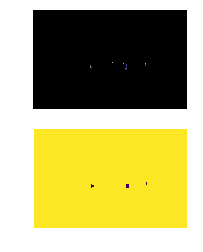

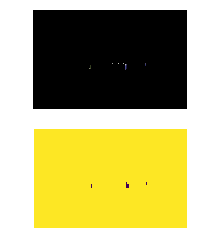

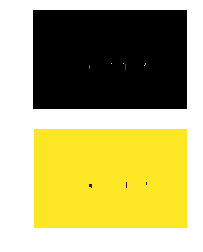

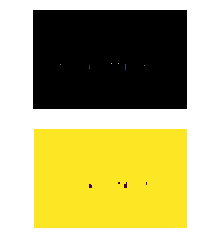

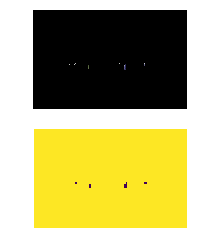

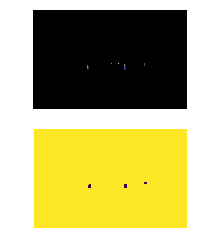

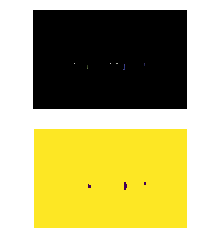

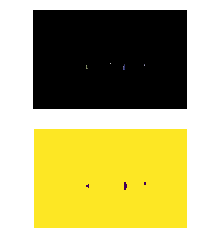

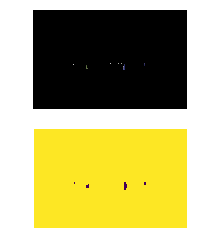

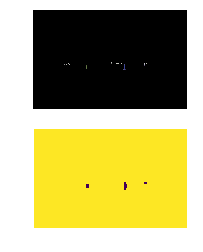

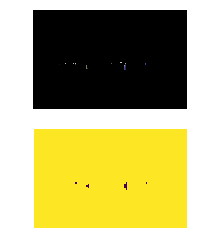

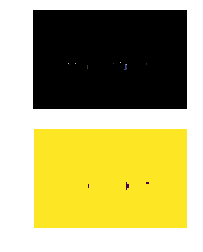

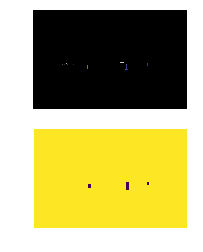

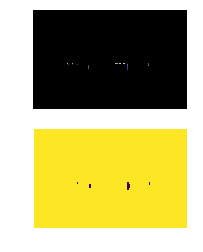

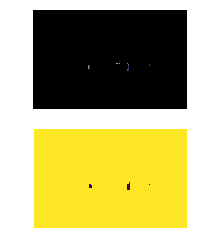

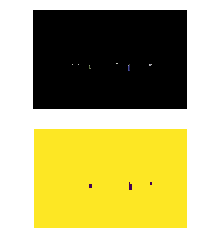

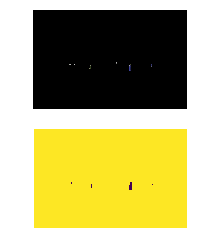

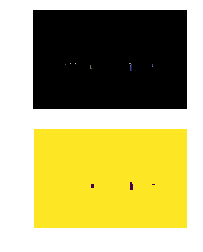

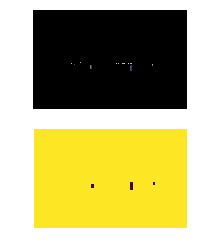

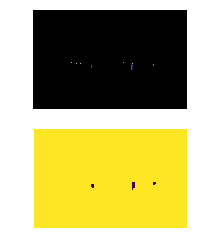

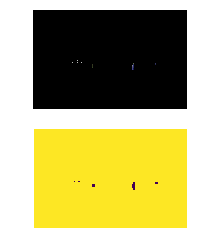

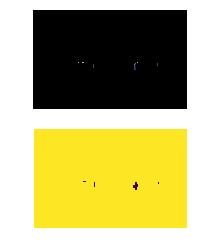

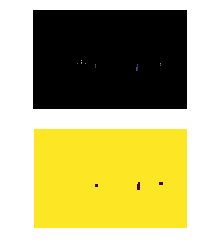

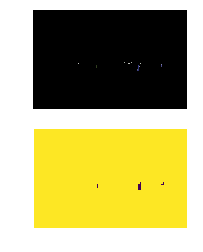

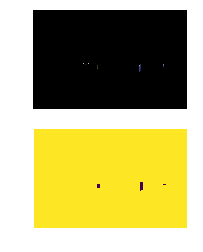

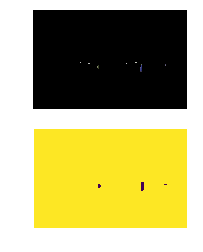

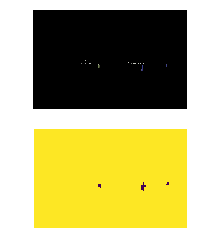

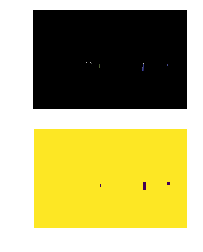

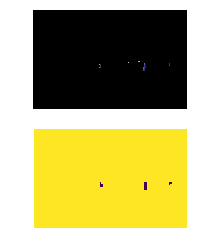

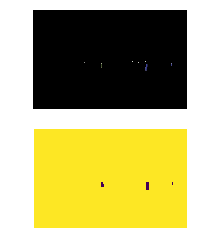

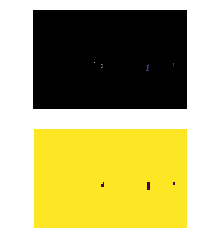

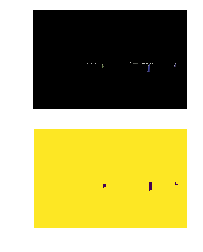

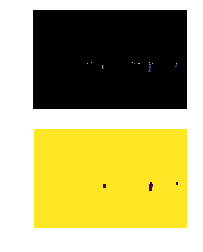

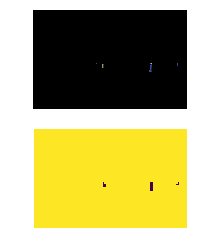

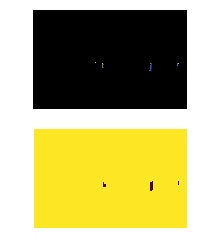

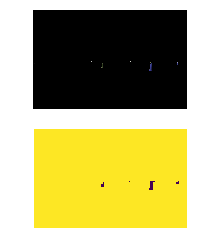

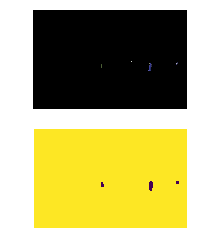

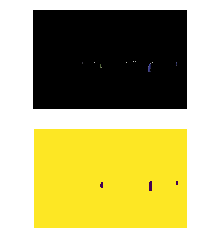

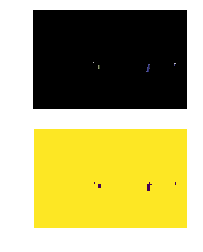

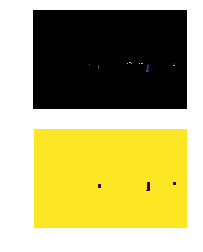

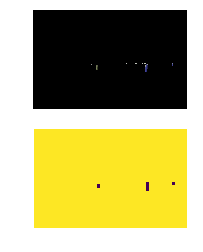

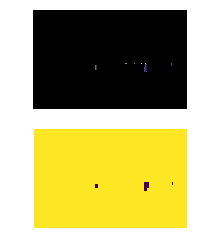

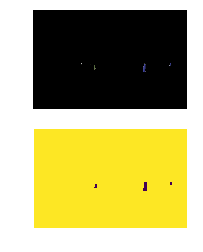

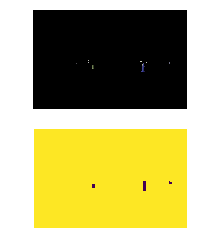

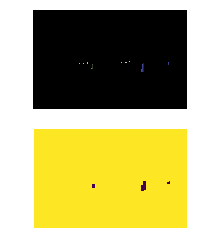

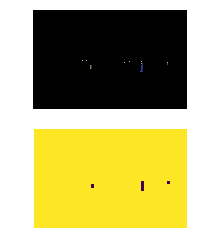

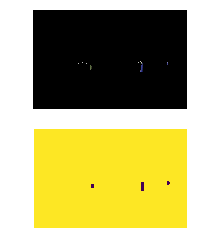

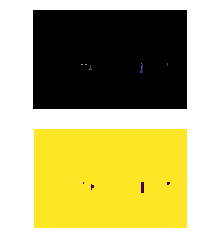

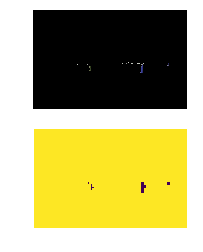

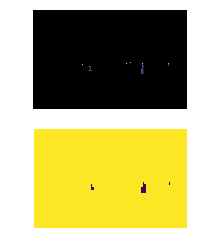

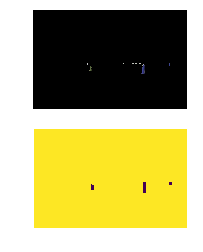

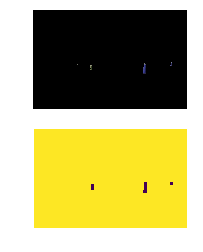

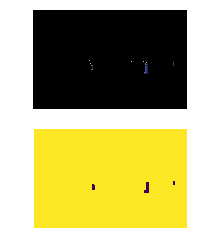

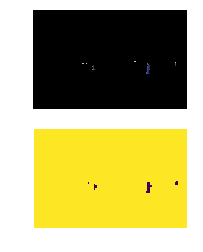

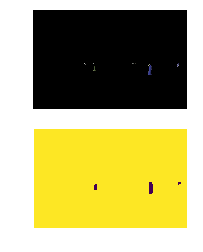

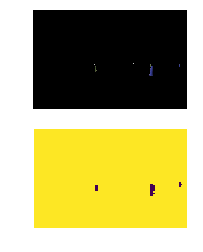

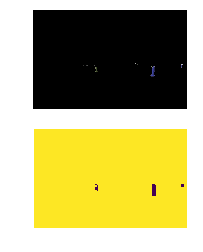

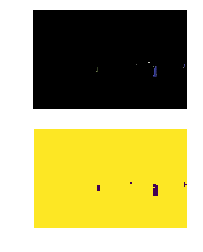

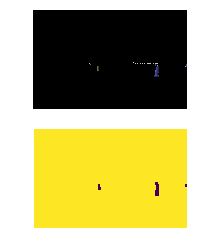

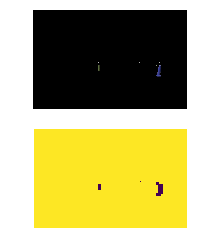

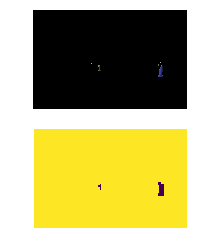

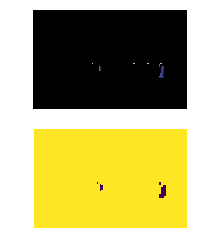

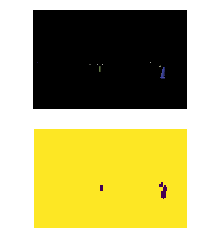

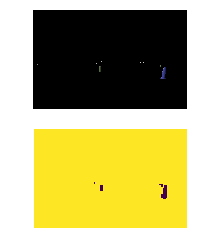

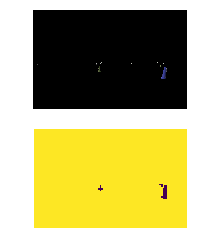

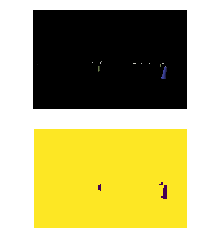

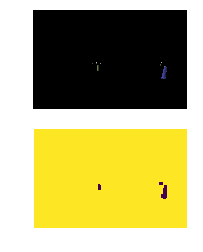

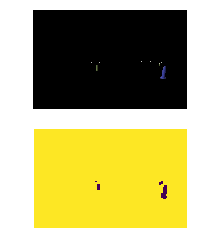

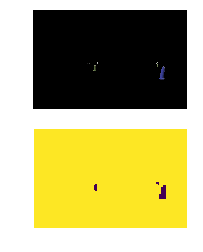

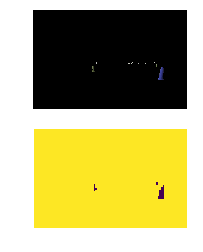

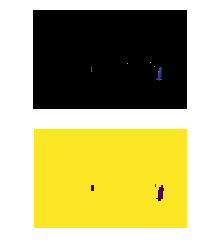

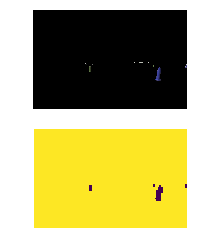

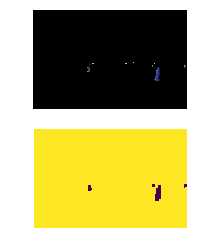

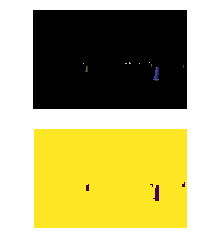

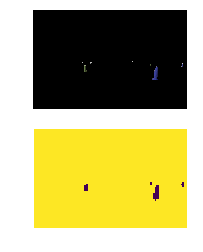

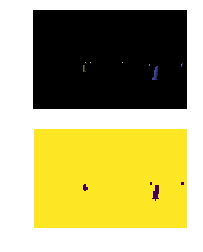

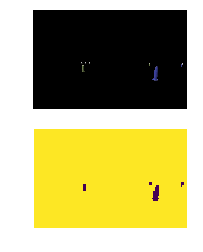

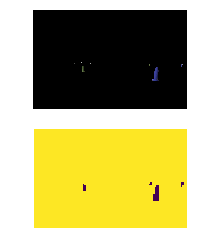

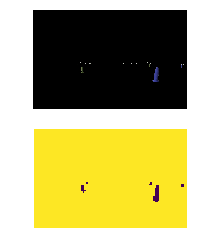

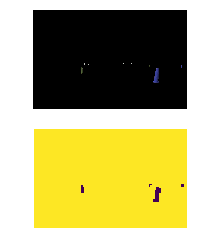

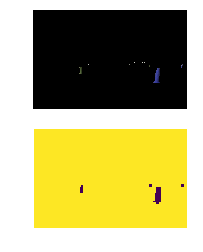

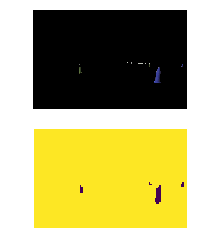

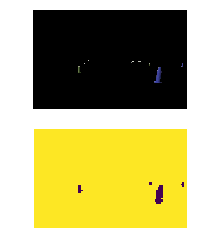

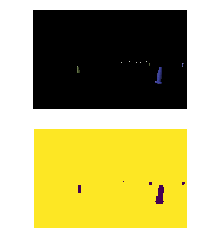

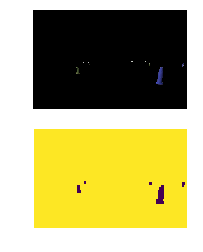

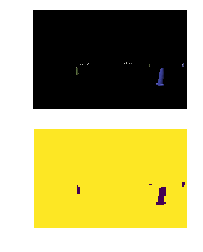

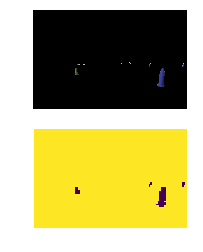

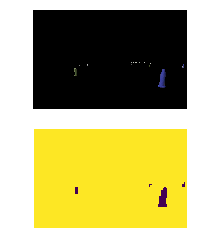

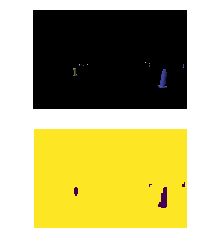

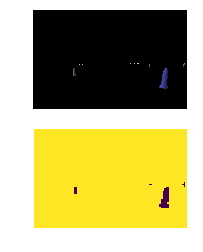

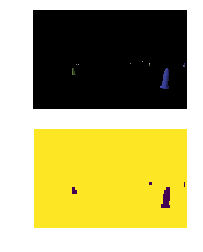

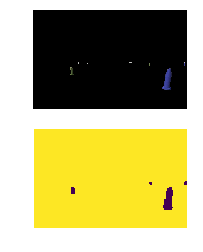

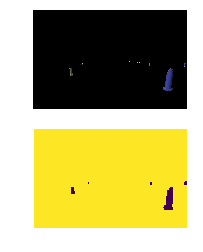

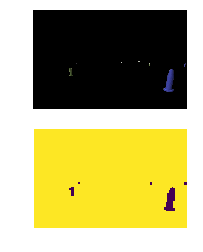

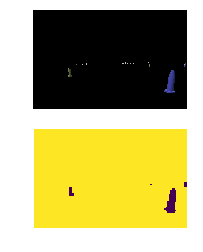

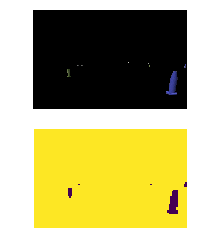

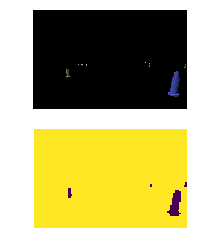

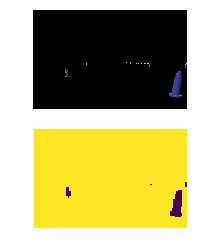

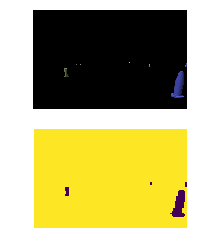

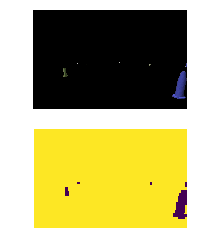

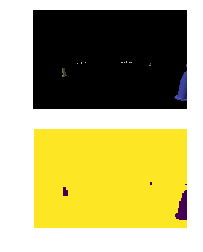

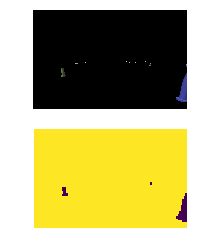

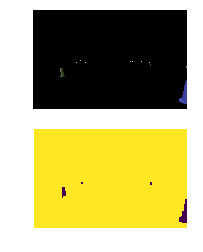

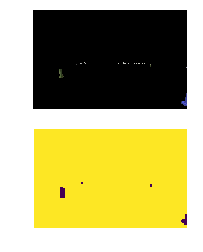

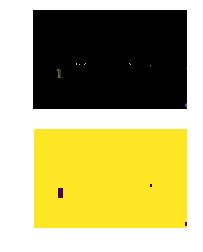

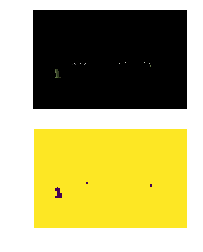

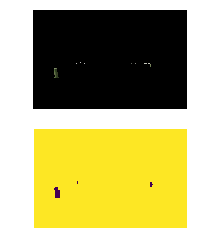

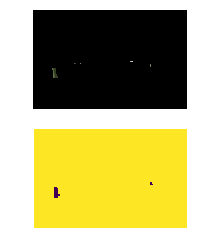

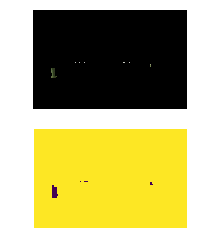

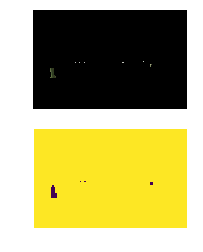

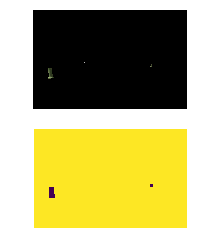

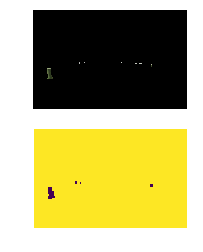

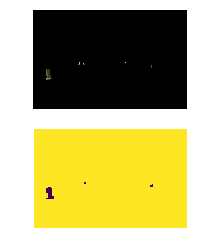

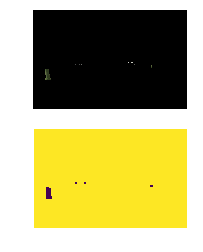

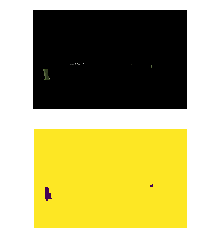

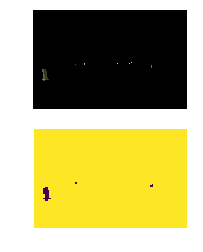

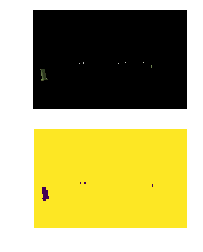

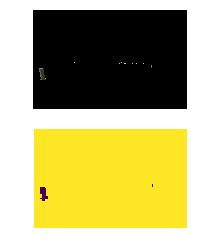

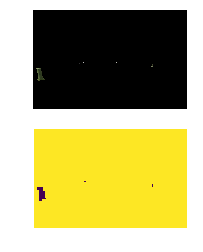

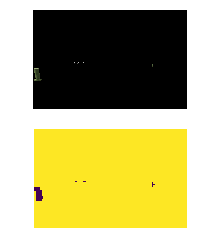

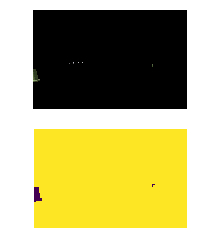

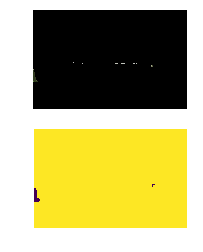

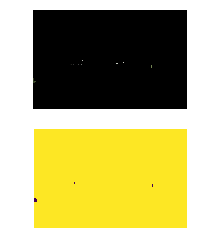

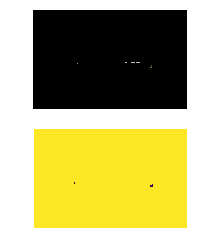

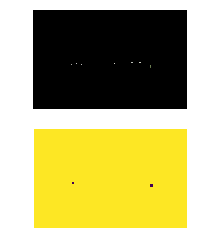

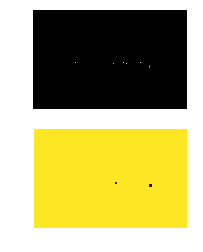

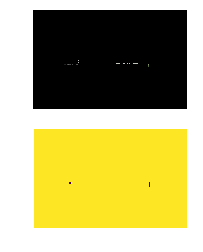

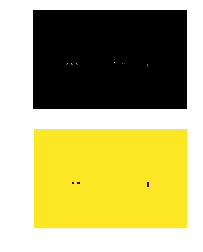

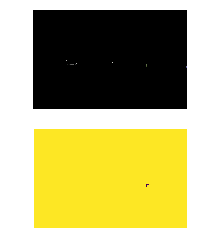

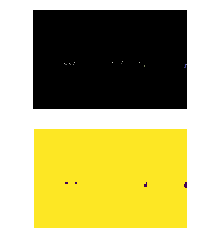

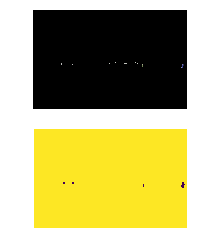

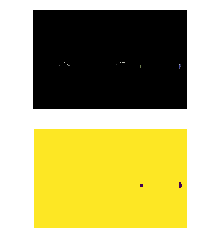

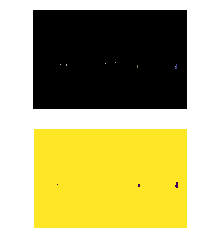

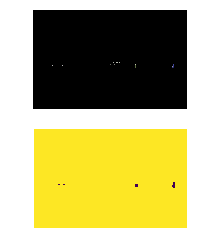

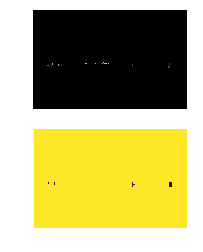

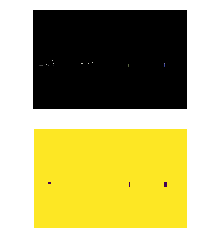

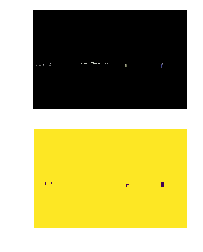

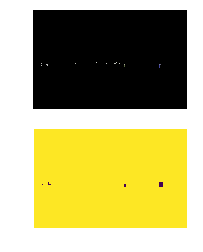

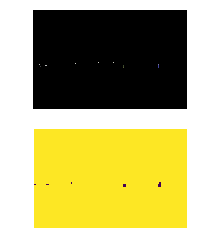

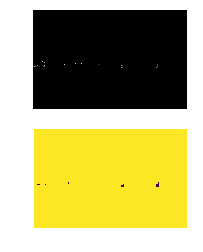

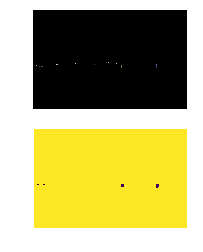

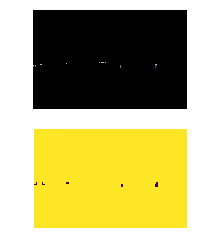

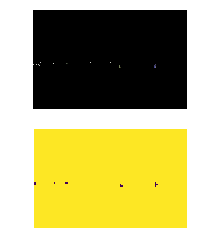

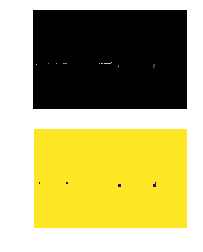

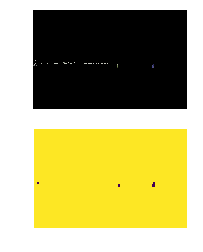

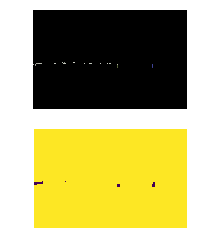

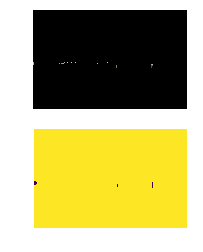

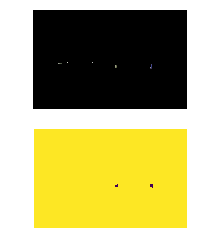

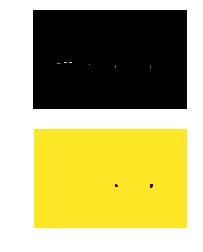

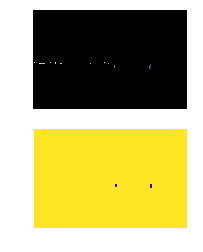

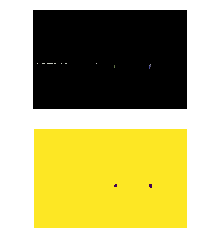

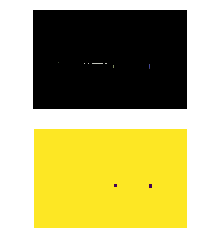

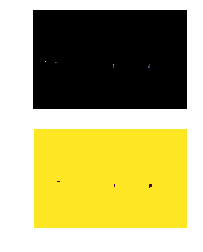

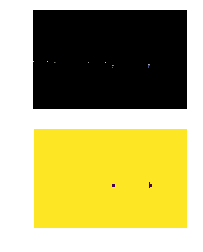

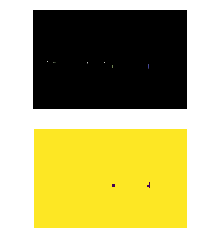

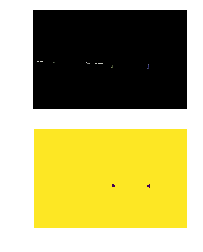

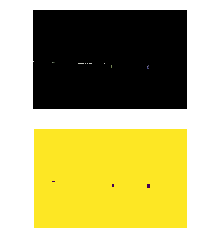

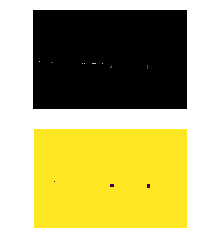

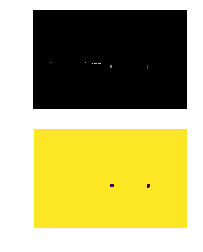

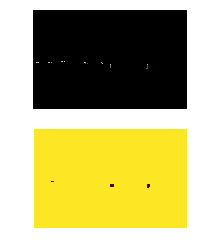

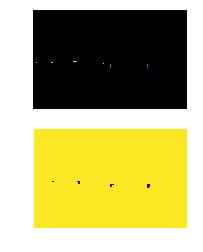

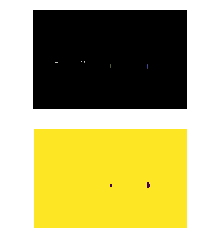

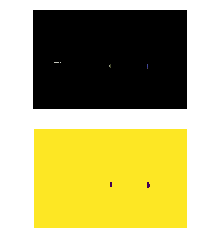

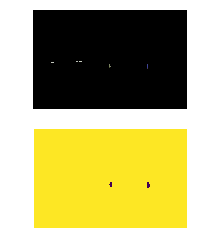

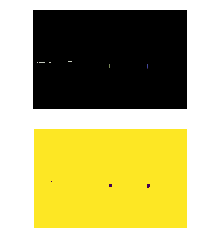

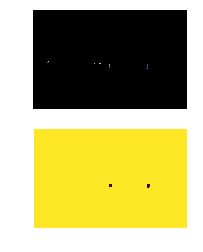

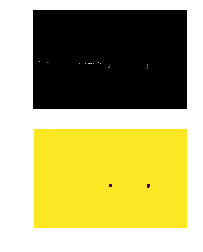

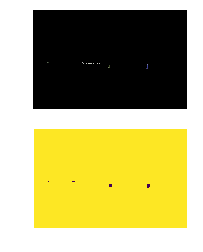

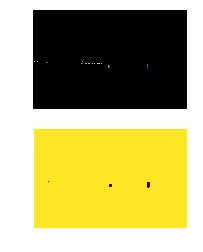

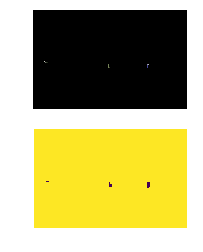

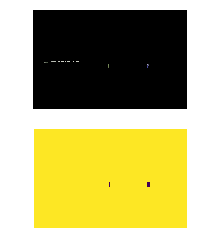

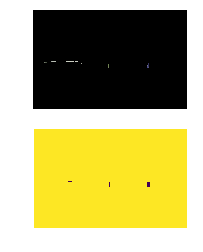

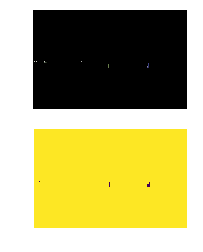

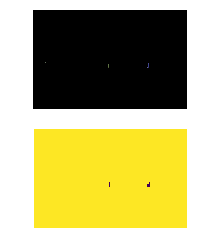

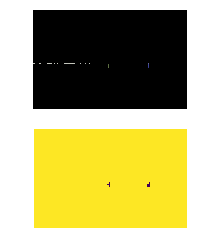

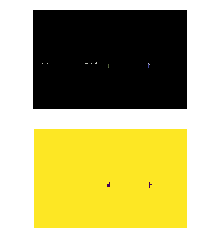

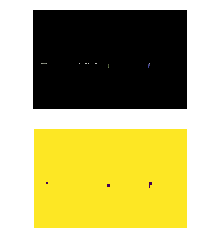

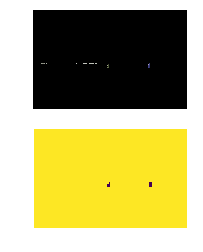

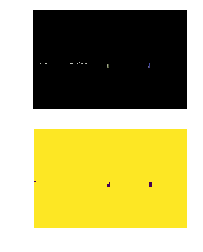

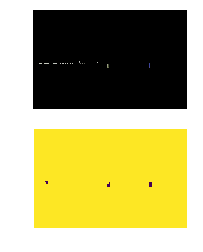

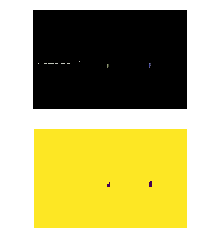

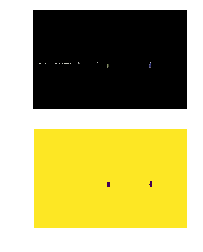

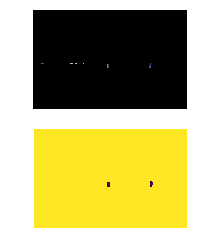

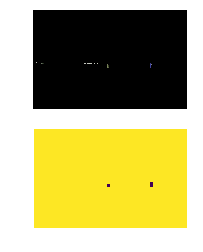

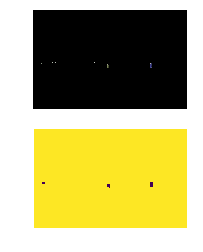

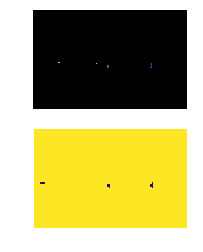

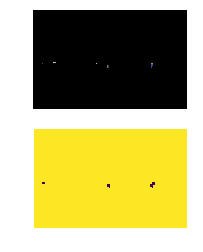

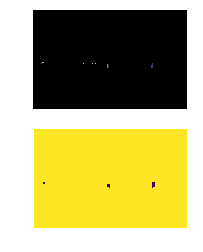

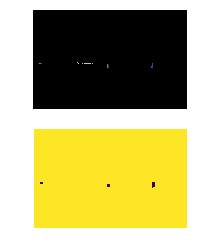

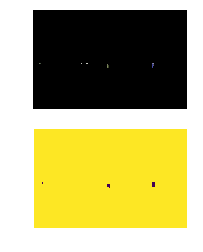

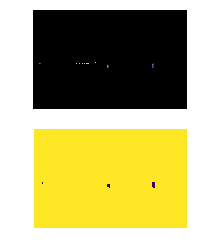

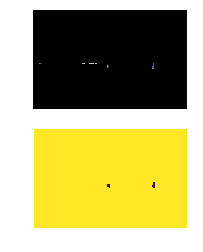

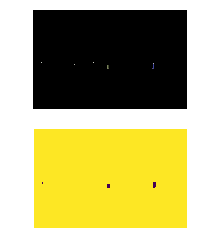

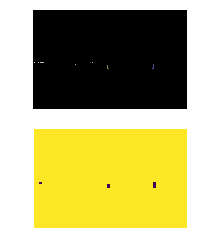

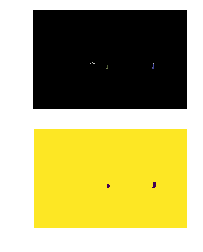

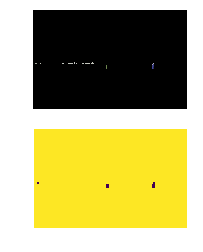

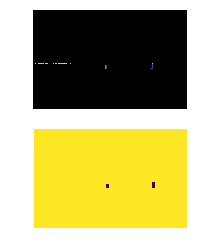

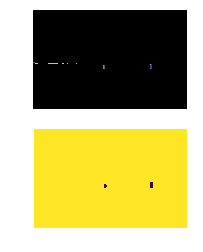

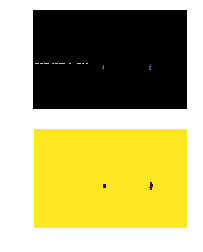

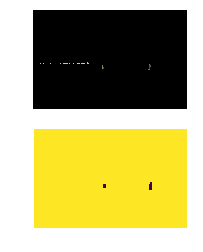

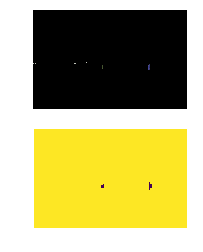

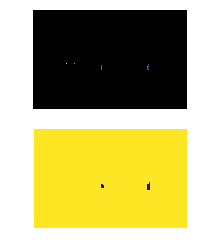

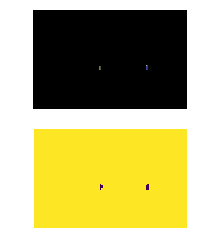

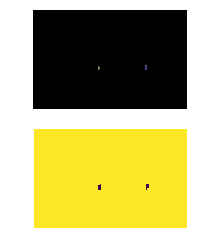

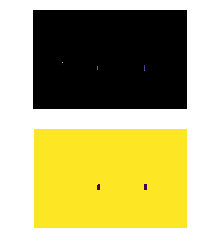

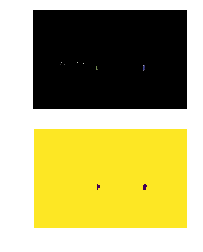

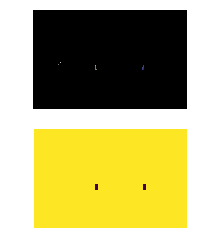

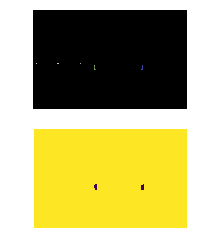

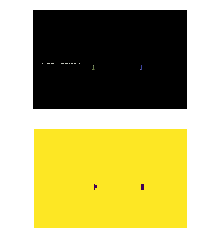

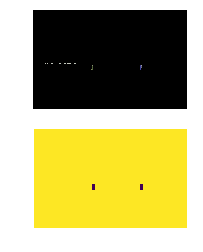

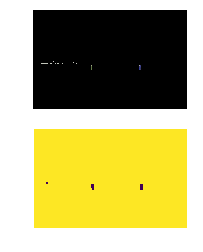

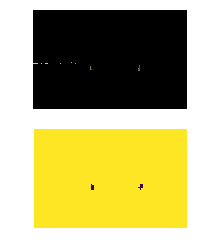

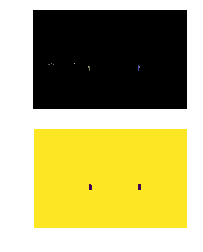

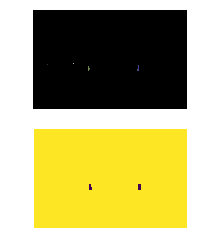

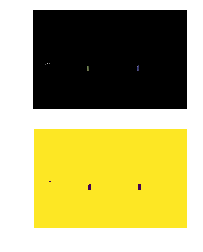

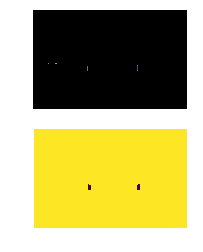

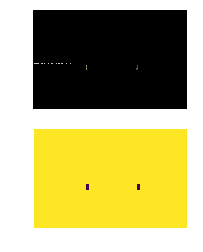

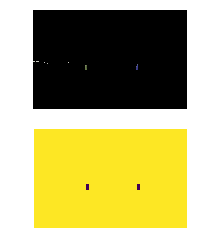

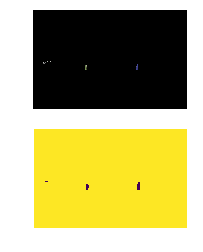

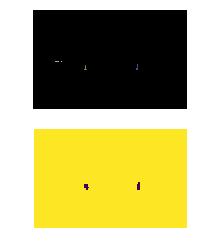

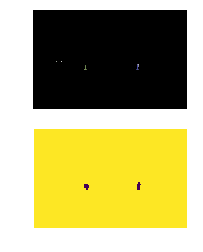

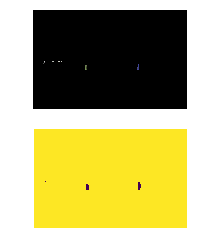

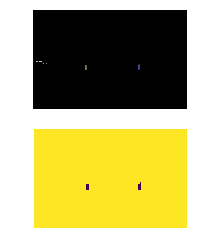

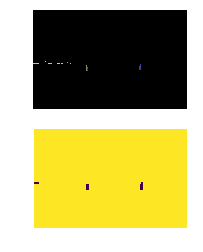

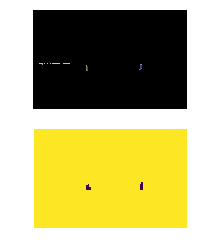

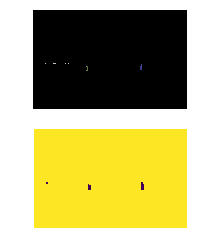

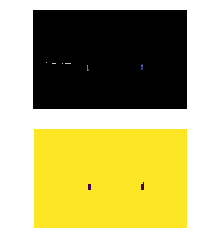

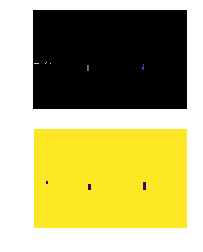

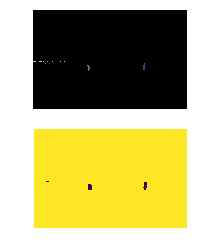

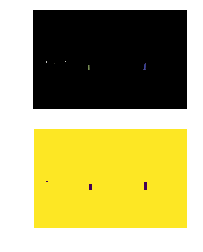

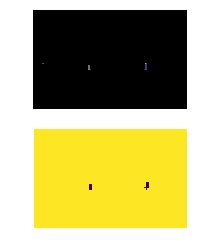

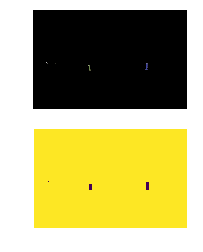

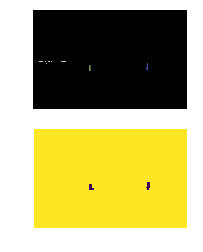

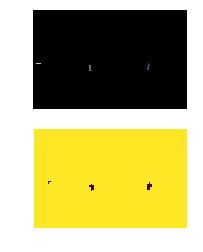

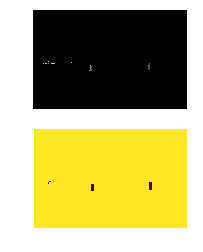

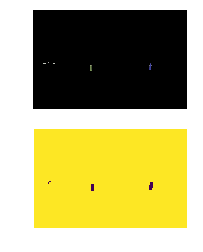

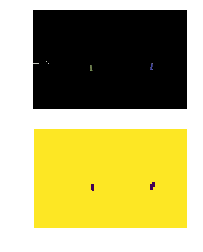

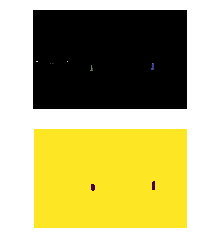

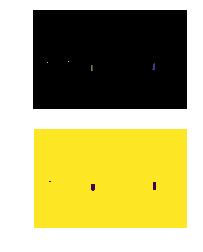

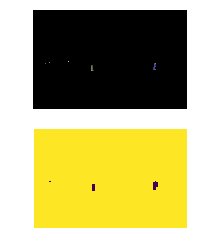

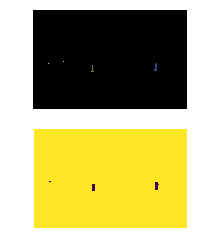

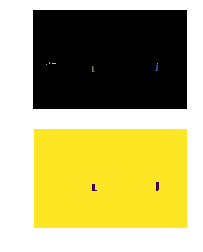

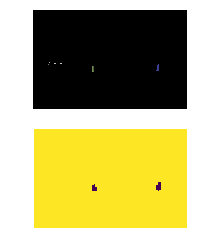

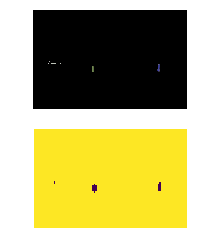

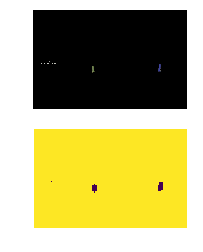

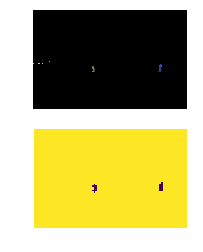

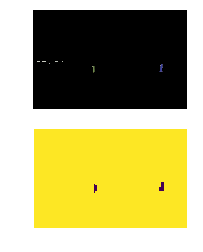

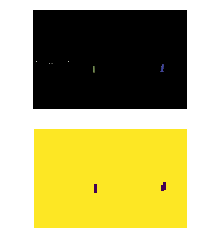

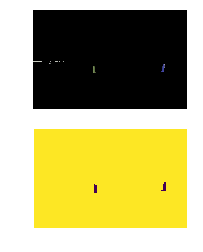

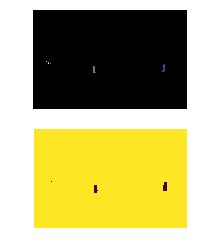

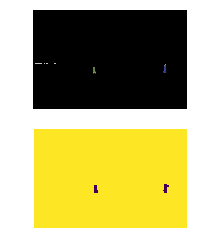

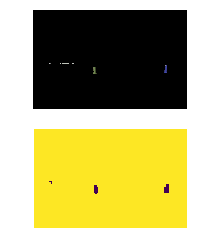

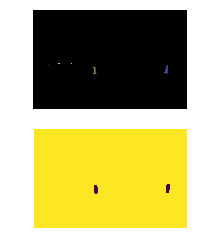

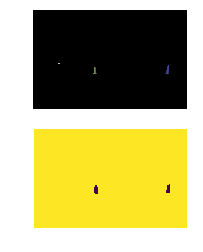

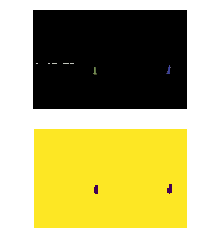

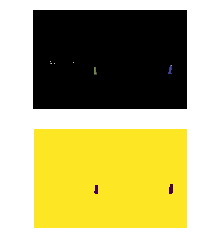

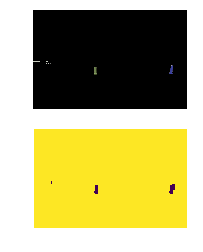

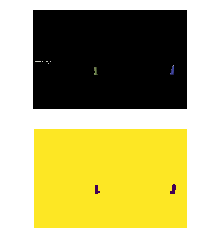

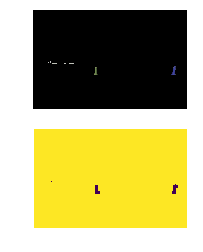

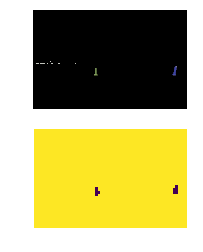

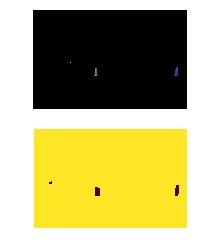

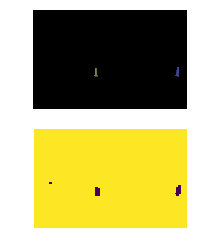

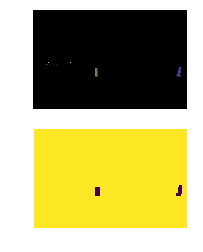

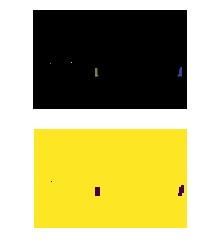

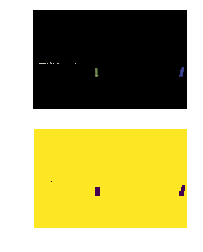

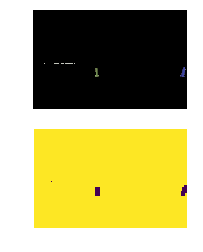

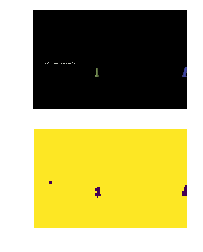

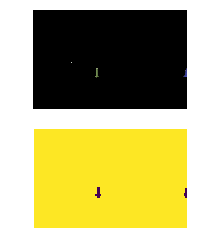

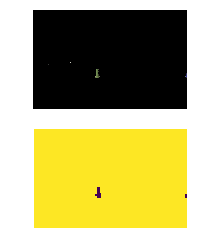

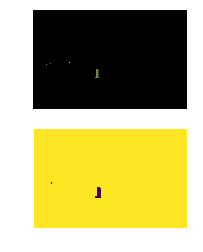

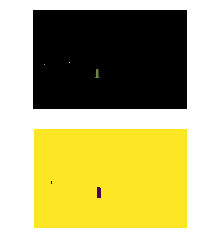

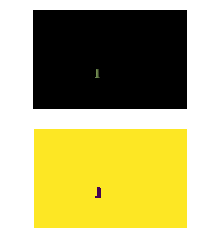

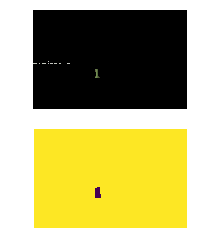

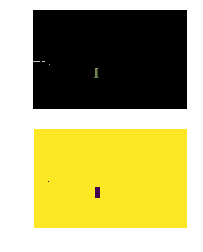

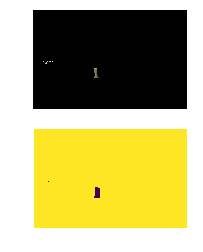

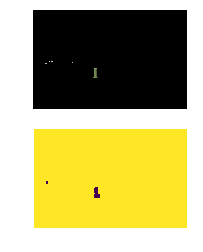

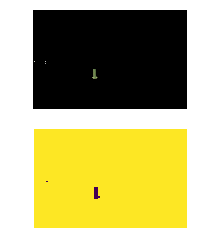

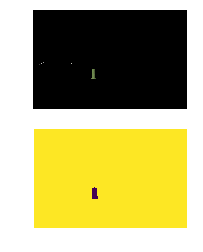

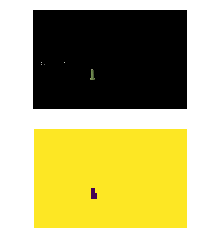

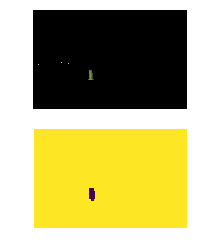

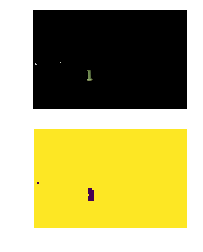

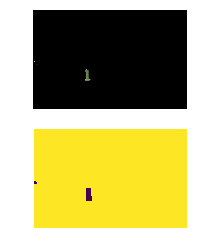

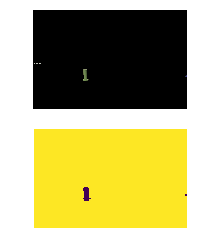

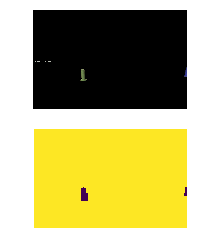

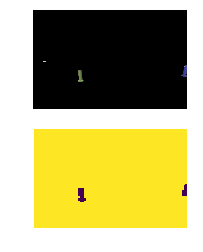

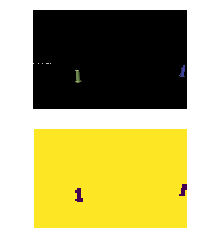

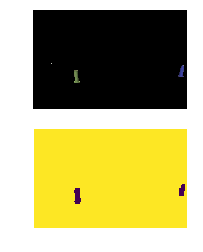

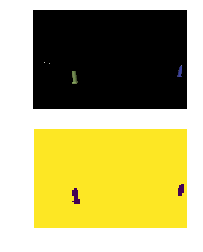

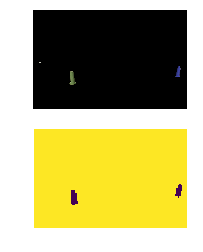

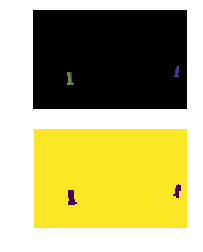

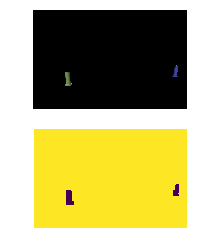

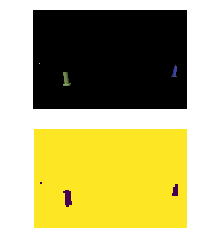

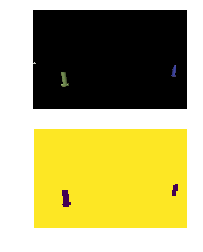

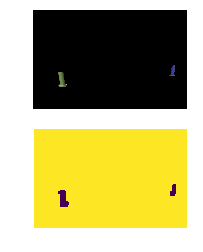

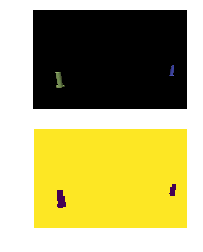

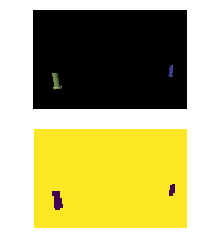

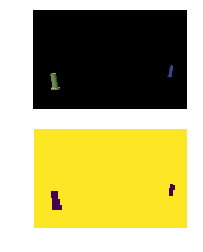

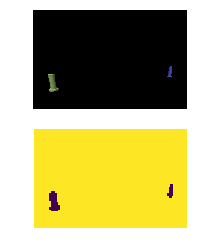

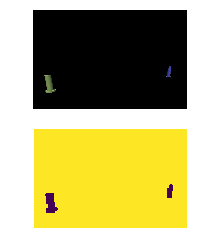

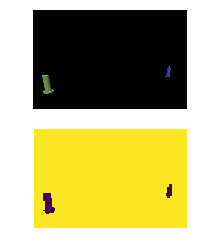

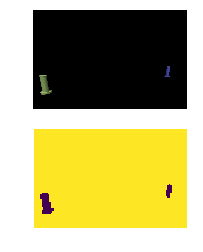

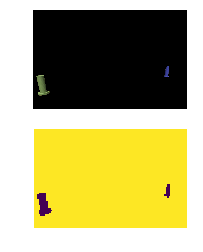

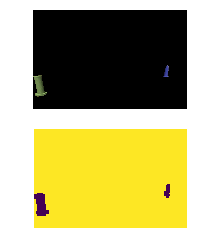

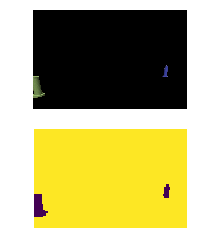

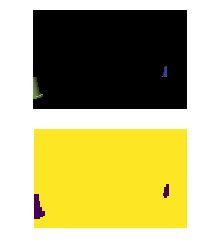

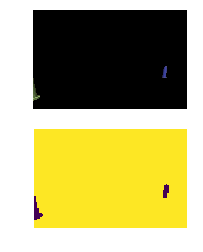

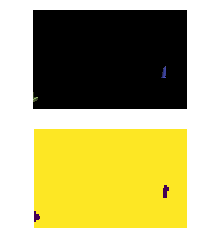

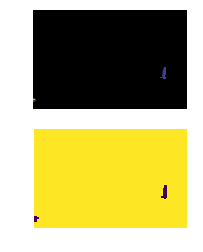

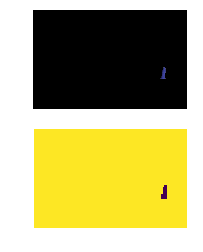

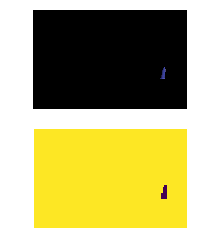

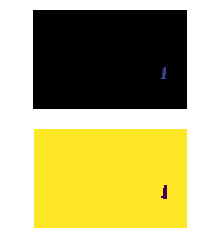

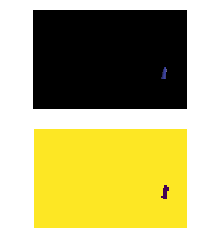

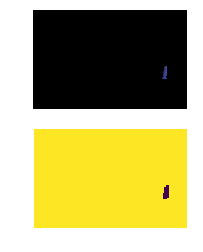

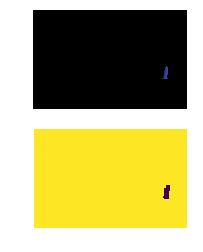

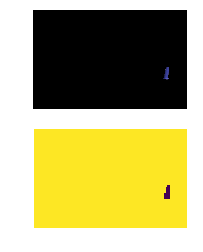

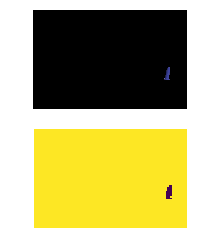

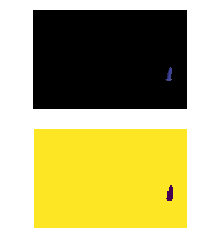

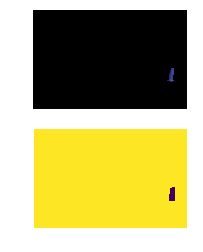

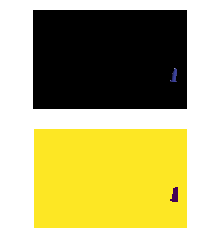

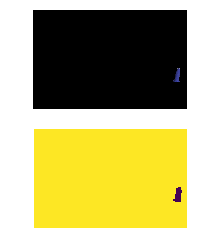

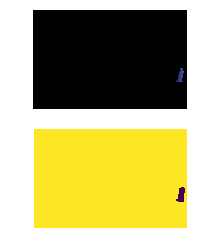

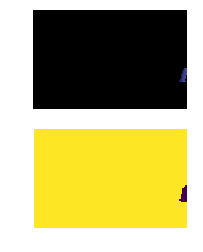

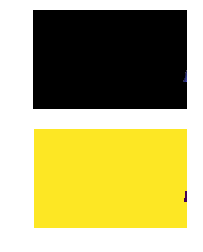

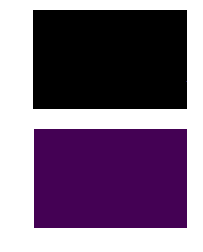

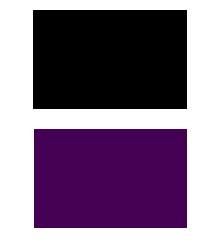

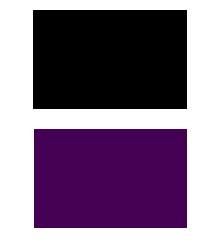

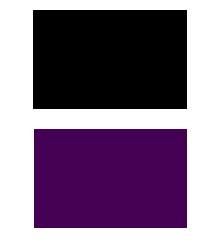

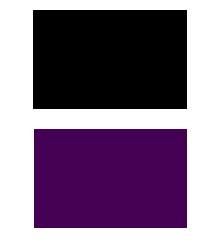

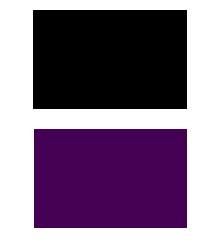

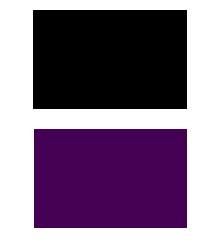

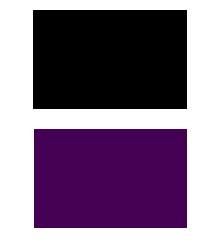

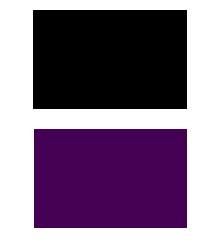

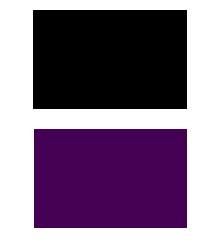

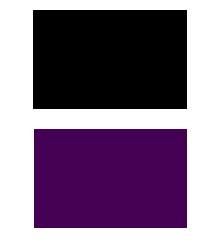

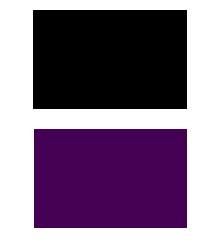

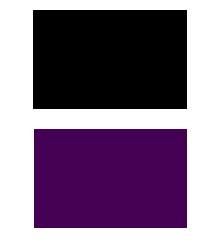

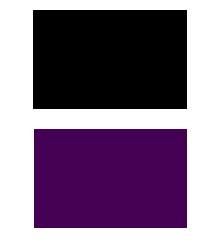

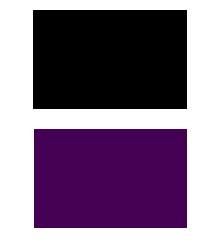

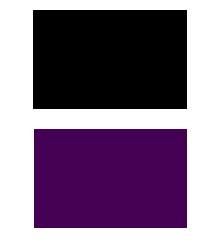

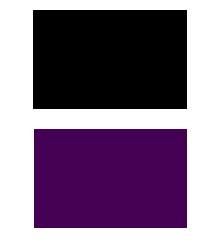

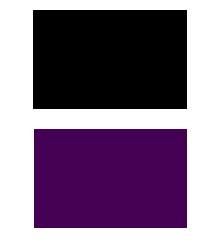

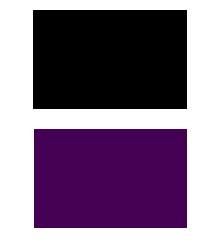

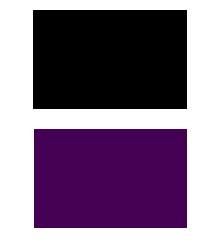

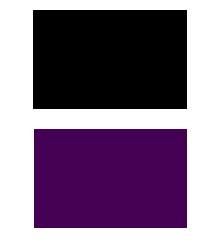

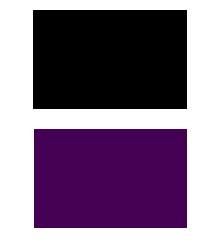

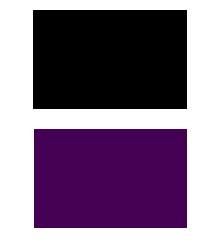

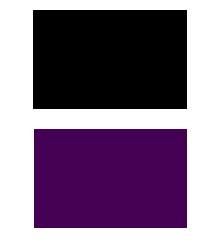

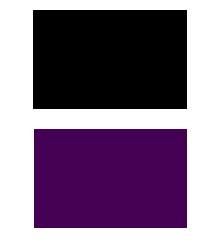

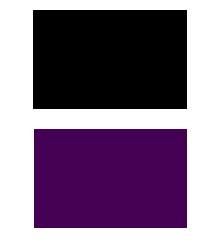

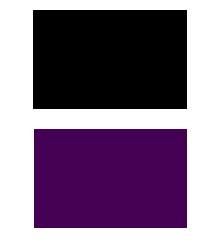

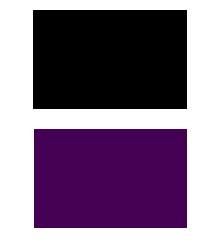

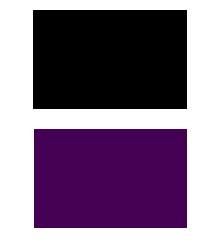

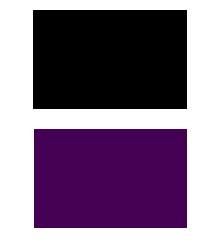

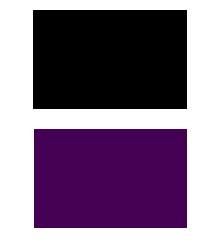

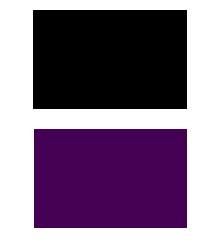

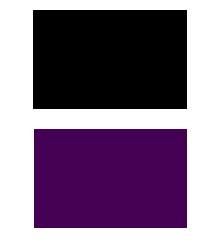

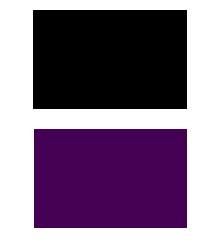

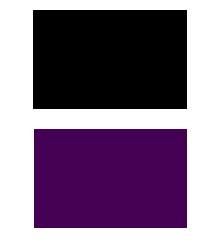

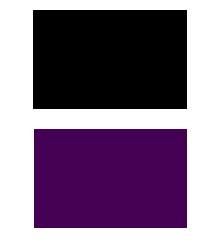

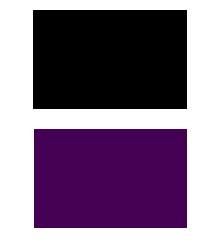

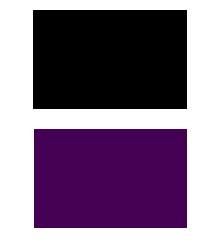

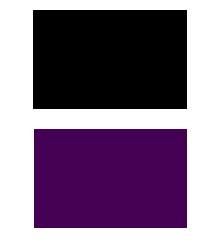

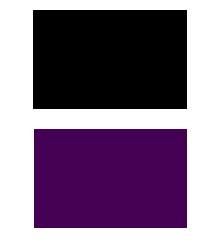

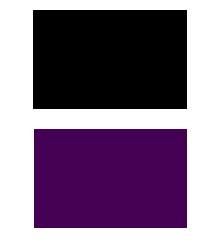

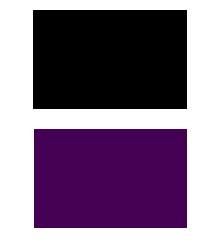

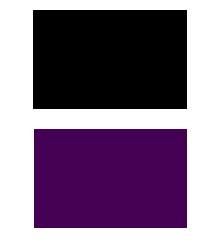

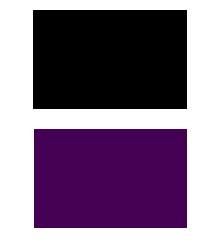

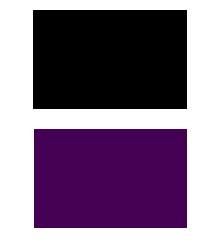

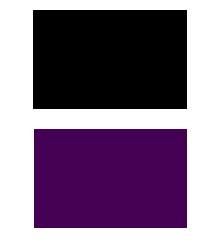

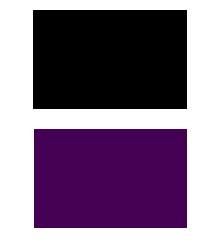

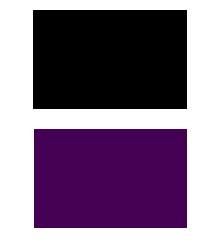

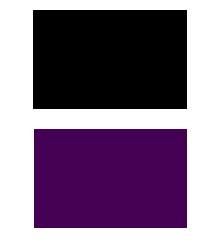

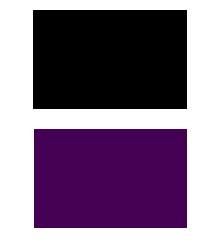

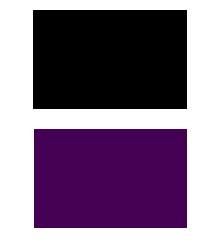

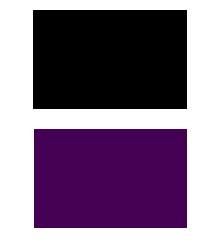

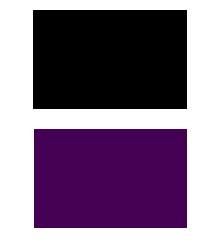

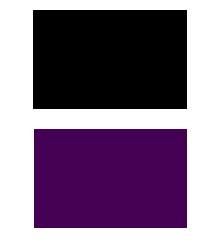

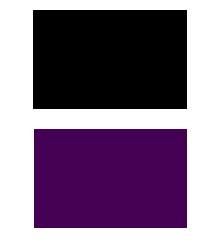

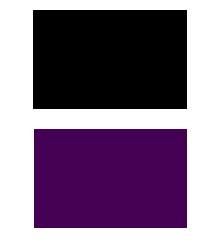

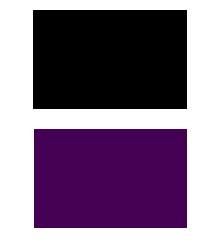

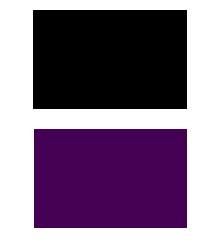

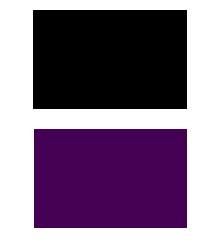

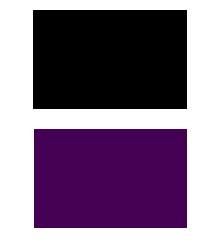

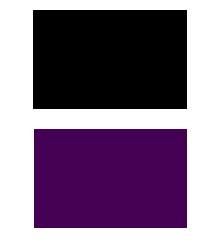

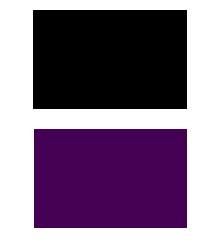

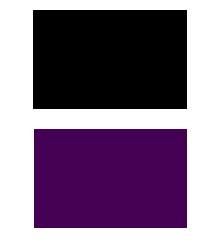

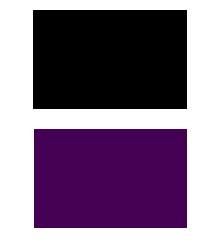

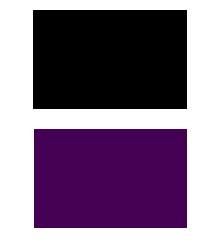

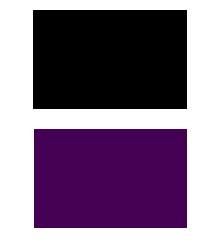

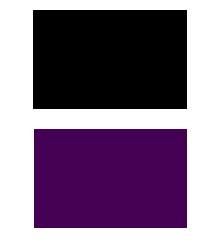

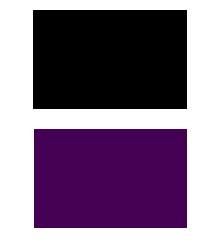

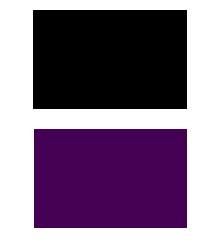

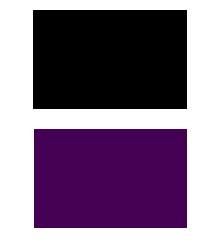

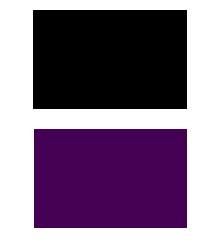

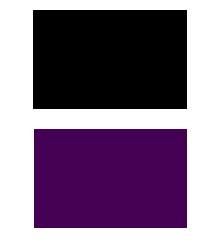

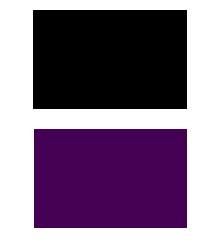

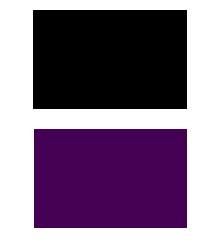

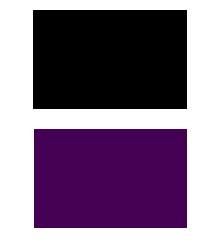

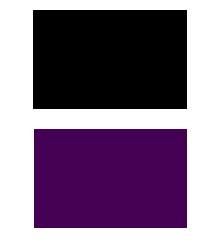

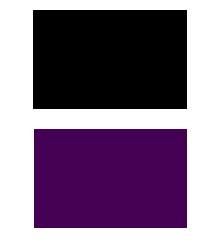

In [56]:
for x in range(0, 595):
    if x >= 0 and x < 10:
        img = cv.imread('input_images/left000' + str(x) + '.jpg',1)
        result1 = transform(img)
        cv.imwrite('output_images/hsv/hsv000' + str(x) + '.jpg', result1)
    elif x > 9 and x < 100:
        img = cv.imread('input_images/left00' + str(x) + '.jpg' ,1)
        result1 = transform(img)
        cv.imwrite('output_images/hsv/hsv00' + str(x) + '.jpg', result1)
    else:
        img = cv.imread('input_images/left0' + str(x) + '.jpg' ,1)
        result1 = transform(img)
        cv.imwrite('output_images/hsv/hsv0' + str(x) + '.jpg', result1)